In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [122]:
load_pred_ann = np.load('./results/load_pred_ann.npy')
load_pred_ann = np.transpose(load_pred_ann.reshape(24, -1)).reshape(-1, 1)
load_pred_cnn = np.load('./results/load_pred_cnn.npy')
load_pred_cnn = np.transpose(load_pred_cnn.reshape(24, -1)).reshape(-1, 1)
load_pred_lstm = np.load('./results/load_pred_lstm.npy')
load_pred_lstm = np.transpose(load_pred_lstm.reshape(24, -1)).reshape(-1, 1)
load_pred_cnnlstm = np.load('./results/load_pred_cnnlstm.npy')
load_pred_seq2seq = np.load('./results/load_pred_seq2seq.npy')
load_pred_transformer = np.load('./results/load_pred_transformer.npy')
load_pred_xgblstm = np.load('./results/load_pred_xgblstm.npy')
load_pred_xgblstm = np.transpose(load_pred_xgblstm.reshape(24, -1)).reshape(-1, 1)
load_pred_xgbtransformer = np.load('./results/load_pred_xgbtransformer.npy')
load_true = np.load('./results/load_true_transformer.npy')

In [126]:
ann_mean = load_pred_ann.reshape(-1, 24).mean(axis=0)
cnn_mean = load_pred_cnn.reshape(-1, 24).mean(axis=0)
lstm_mean = load_pred_lstm.reshape(-1, 24).mean(axis=0)
transformer_mean = load_pred_transformer.reshape(-1, 24).mean(axis=0)
xgbtransformer_mean = load_pred_xgbtransformer.reshape(-1, 24).mean(axis=0)
true_mean = load_true.reshape(-1, 24).mean(axis=0)

cnnlstm_mean = load_pred_cnnlstm.reshape(-1, 24).mean(axis=0)
seq2seq_mean = load_pred_seq2seq.reshape(-1, 24).mean(axis=0)
xgblstm_mean = load_pred_xgblstm.reshape(-1, 24).mean(axis=0)

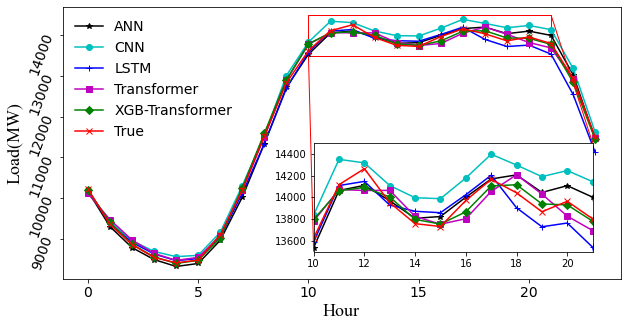

In [129]:
length=24
fig, ax = plt.subplots(1,1,figsize=(10, 5))
font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 18}
plt.plot(ann_mean[:length], '-k*', label='ANN')
plt.plot(cnn_mean[:length], '-co', label='CNN')
plt.plot(lstm_mean[:length], '-b+', label='LSTM')
plt.plot(transformer_mean[:length], '-ms', label='Transformer')
plt.plot(xgbtransformer_mean[:length], '-gD', label='XGB-Transformer')
plt.plot(true_mean[:length], '-rx', label='True')
axins = ax.inset_axes((0.45,0.1,0.5,0.4))
axins.plot(ann_mean[:length], '-k*', label='ANN')
axins.plot(cnn_mean[:length], '-co', label='CNN')
axins.plot(lstm_mean[:length], '-b+', label='LSTM')
axins.plot(transformer_mean[:length], '-ms', label='Transformer')
axins.plot(xgbtransformer_mean[:length], '-gD', label='XGB-Transformer')
axins.plot(true_mean[:length], '-rx', label='True')
axins.set_xlim(10, 21)
axins.set_ylim(13500, 14500)
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec='r', lw=1)
plt.xlabel('Hour', font)
plt.ylabel('Load(MW)', font)
plt.yticks(rotation=70)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper left', frameon=False)
plt.savefig('./results_single_model.png', bbox_inches='tight', dpi=600, format='png')

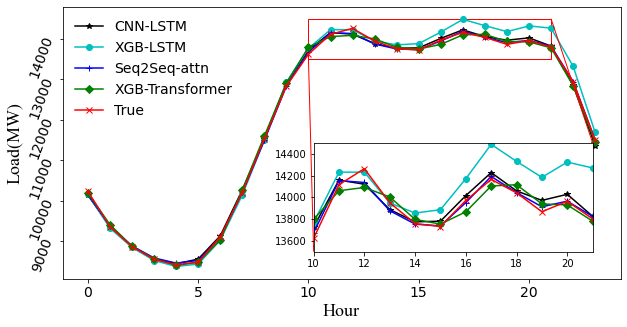

In [128]:
length=24
fig, ax = plt.subplots(1,1,figsize=(10, 5))
font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 18}
plt.plot(cnnlstm_mean[:length], '-k*', label='CNN-LSTM')
plt.plot(xgblstm_mean[:length], '-co', label='XGB-LSTM')
plt.plot(seq2seq_mean[:length], '-b+', label='Seq2Seq-attn')
plt.plot(xgbtransformer_mean[:length], '-gD', label='XGB-Transformer')
plt.plot(true_mean[:length], '-rx', label='True')
axins = ax.inset_axes((0.45,0.1,0.5,0.4))
axins.plot(cnnlstm_mean[:length], '-k*', label='CNN-LSTM')
axins.plot(xgblstm_mean[:length], '-co', label='XGB-LSTM')
axins.plot(seq2seq_mean[:length], '-b+', label='Seq2Seq-attn')
axins.plot(xgbtransformer_mean[:length], '-gD', label='XGB-Transformer')
axins.plot(true_mean[:length], '-rx', label='True')
axins.set_xlim(10, 21)
axins.set_ylim(13500, 14500)
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec='r', lw=1)
plt.xlabel('Hour', font)
plt.ylabel('Load(MW)', font)
plt.yticks(rotation=70)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper left', frameon=False)
plt.savefig('./results_multi_model.png', bbox_inches='tight', dpi=600, format='png')

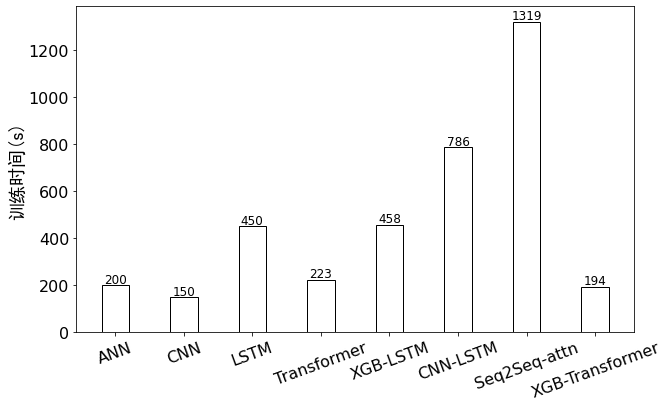

In [144]:
plt.figure(figsize=(10, 6))
font = {'family': 'SimHei', 'weight': 'normal', 'size': 18}
data = [200,150,450,223,458,786,1319,194]
labels = ['ANN', 'CNN','LSTM','Transformer','XGB-LSTM','CNN-LSTM','Seq2Seq-attn','XGB-Transformer']
bars = plt.bar(range(len(data)), data, width=0.4, ec='k', ls='-', tick_label=labels, color='w')
# plt.xlabel('模型', font)
plt.ylabel('训练时间(s)', font)
# plt.ylim(top=700)
plt.xticks(fontsize=16)
plt.xticks(rotation=20)
plt.yticks(fontsize=16)
for x, y in enumerate(data):
    plt.text(x, y+10, y, ha='center', fontsize=12)
plt.savefig('./train time.png', bbox_inches='tight', dpi=220, format='png')